<a href="https://colab.research.google.com/github/Aladdin60/Project-Silver-swift/blob/main/COLAB/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression MAE: 19.937550291015103
Linear Regression MSE: 652.1570746505655
Linear Regression R-squared: -0.00856684199821145
     Actual Cash Flow  Predicted Cash Flow (Linear Regression)
521          4.642522                                 9.899644
737        -23.811609                                 8.540689
740          5.661871                                 5.184782
660        -24.201522                                -0.374392
411         17.319680                                 4.580195


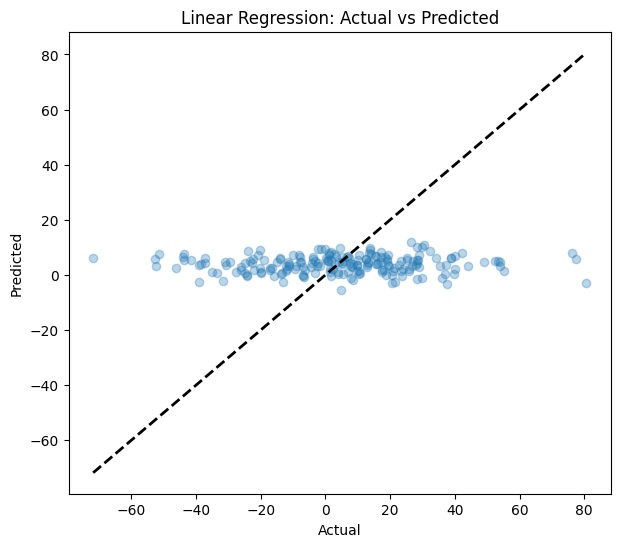

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
data = pd.read_csv('/content/cash_flow_data_ final.csv')

# Define features and target
features = ['Revenue/Sales', 'Total Income', 'Tax', 'Net Profit', 'Accounts Receivable',
            'Accounts Payable', 'Total Expenditure', 'Interest', 'GDP Growth',
            'Inflation/Interest Rate', 'Expenses', 'Cap. Expenditure', 'Seasonality',
            'Client Payment Trends', 'EBIT']
target = 'Cash Flow'

# Split the data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression MAE: {mae_lr}')
print(f'Linear Regression MSE: {mse_lr}')
print(f'Linear Regression R-squared: {r2_lr}')

# Adding predicted cash flow values to the data
results_lr = pd.DataFrame({
    'Actual Cash Flow': y_test,
    'Predicted Cash Flow (Linear Regression)': y_pred_lr
})

# Display the first few rows of the predictions
print(results_lr.head())

# Plotting
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()
